In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from src.crypto_data import BinanceDataManager

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [10]:
# List of Coin pairs to Backtest. This list consists of 184 pairs with the following selection criteria:
# Coins whose Market Cap rank is between 10 and 300, denominated in USDT and Margin Trading is allowed
# and for which perp data could be found as of 15/10/2024
pairs_to_backtest = ['STORJUSDT', 'VANRYUSDT', 'OPUSDT', 'SUNUSDT', 'RENDERUSDT', 'PENDLEUSDT', 'CRVUSDT', 'ETHFIUSDT', 'BCHUSDT', 'BNXUSDT', 'HBARUSDT', 'IOTAUSDT', 'KSMUSDT', 'WUSDT', 'SANDUSDT', 'ARBUSDT', 'CKBUSDT', 'KAVAUSDT', 'HOTUSDT', 'BATUSDT', 'SUSHIUSDT', 'ORDIUSDT', 'BANANAUSDT', 'TUSDT', 'BBUSDT', 'CHZUSDT', '1000SATSUSDT', 'FXSUSDT', 'FTTUSDT', 'GUSDT', 'NEARUSDT', 'GRTUSDT', 'SUIUSDT', 'PEOPLEUSDT', 'ASTRUSDT', 'JTOUSDT', 'RUNEUSDT', 'TIAUSDT', 'ZILUSDT', 'STXUSDT', 'QNTUSDT', 'NOTUSDT', 'FLOWUSDT', 'KDAUSDT', 'MASKUSDT', 'FLUXUSDT', 'VETUSDT', 'MANTAUSDT', 'ATOMUSDT', 'CELOUSDT', 'TWTUSDT', 'FILUSDT', 'IDUSDT', 'ANKRUSDT', 'ENJUSDT', 'WIFUSDT', 'ACHUSDT', 'TAOUSDT', 'GLMRUSDT', 'GASUSDT', 'ONTUSDT', 'LPTUSDT', 'RAYUSDT', 'GMTUSDT', 'ETCUSDT', 'COMPUSDT', 'ICPUSDT', 'MANAUSDT', 'SKLUSDT', 'AXSUSDT', 'AAVEUSDT', 'CVXUSDT', 'ALTUSDT', 'YGGUSDT', 'IMXUSDT', 'JASMYUSDT', 'ONEUSDT', 'DYDXUSDT', 'SEIUSDT', 'SCUSDT', 'SUPERUSDT', 'XLMUSDT', 'CVCUSDT', 'NEOUSDT', 'BLURUSDT', 'SAGAUSDT', 'XAIUSDT', 'EOSUSDT', 'ENAUSDT', 'COTIUSDT', 'ALGOUSDT', 'GMXUSDT', 'KLAYUSDT', 'AEVOUSDT', 'AVAXUSDT', 'IOUSDT', 'MEMEUSDT', 'SFPUSDT', 'XTZUSDT', 'AXLUSDT', 'RVNUSDT', 'ICXUSDT', 'LDOUSDT', 'ENSUSDT', 'YFIUSDT', 'LRCUSDT', 'THETAUSDT', 'ILVUSDT', 'MINAUSDT', 'PIXELUSDT', 'STRKUSDT', 'FETUSDT', 'SSVUSDT', '1INCHUSDT', 'METISUSDT', 'POLUSDT', 'GLMUSDT', 'INJUSDT', 'TURBOUSDT', 'MKRUSDT', 'ZECUSDT', 'ARUSDT', 'CAKEUSDT', 'BICOUSDT', 'EDUUSDT', 'NEIROUSDT', 'QTUMUSDT', 'APTUSDT', 'FTMUSDT', 'CHRUSDT', 'OMUSDT', 'UNIUSDT', 'EGLDUSDT', 'DASHUSDT', 'HMSTRUSDT', 'RSRUSDT', 'WOOUSDT', 'JUPUSDT', 'SNXUSDT', 'CFXUSDT', 'ADAUSDT', 'IOTXUSDT', 'LINKUSDT', 'UMAUSDT', 'RPLUSDT', 'TRBUSDT', 'SXPUSDT', 'DOTUSDT', 'BOMEUSDT', 'APEUSDT', 'BANDUSDT', 'POLYXUSDT', 'ZROUSDT', 'ZRXUSDT', 'WLDUSDT', 'PYTHUSDT', 'ARKMUSDT', 'GALAUSDT', 'ROSEUSDT', 'DOGSUSDT', 'LTCUSDT', 'DYMUSDT', 'ZKUSDT']


In [11]:
dataframes = [
    BinanceDataManager.data_to_df(f"/Users/ivankyulev/Projects/Notebooks/data/futures/um/monthly/klines/{pair}/1h/")
    for pair in pairs_to_backtest
]

In [12]:
dataframes

[                     open  high  low  close       volume  quote_volume  \
 open_time                                                                
 2020-09-16 07:00:00  0.42  0.46 0.42   0.44   668,662.00    297,737.28   
 2020-09-16 08:00:00  0.44  0.45 0.43   0.44   331,362.00    146,643.62   
 2020-09-16 09:00:00  0.44  0.44 0.43   0.44   144,637.00     63,028.21   
 2020-09-16 10:00:00  0.44  0.44 0.42   0.43   223,163.00     96,444.20   
 2020-09-16 11:00:00  0.43  0.44 0.43   0.44   194,459.00     84,289.24   
 ...                   ...   ...  ...    ...          ...           ...   
 2024-09-30 19:00:00  0.41  0.41 0.41   0.41   427,773.00    176,372.38   
 2024-09-30 20:00:00  0.41  0.42 0.41   0.41   430,733.00    178,351.93   
 2024-09-30 21:00:00  0.41  0.42 0.41   0.41   386,781.00    160,648.10   
 2024-09-30 22:00:00  0.41  0.41 0.41   0.41   537,167.00    221,202.90   
 2024-09-30 23:00:00  0.41  0.41 0.40   0.41 1,892,452.00    770,246.67   
 
                       

In [5]:
df.describe()

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
count,"41,640.00","41,640.00","41,640.00","41,640.00","41,640.00","41,640.00","41,640.00","41,640.00","41,640.00"
mean,"33,778.11","33,936.04","33,612.98","33,779.46","15,673.69","505,174,232.71","129,699.20","7,813.95","251,392,324.49"
std,"18,257.07","18,341.51","18,167.78","18,257.19","16,947.20","570,613,032.50","126,847.61","8,486.44","284,032,497.76"
min,"4,062.95","4,598.00","3,621.81","4,062.89",63.93,"3,157,740.22",457.00,28.10,"1,388,152.24"
25%,"19,220.07","19,300.00","19,150.07","19,220.17","6,196.12","165,791,682.01","52,535.50","3,067.35","81,527,791.89"
50%,"30,258.80","30,333.25","30,155.90","30,258.85","10,509.67","343,274,059.51","95,526.00","5,225.93","170,514,959.71"
75%,"47,256.18","47,502.74","47,011.93","47,257.03","18,688.57","636,750,183.51","163,944.00","9,311.95","316,674,095.41"
max,"73,644.50","73,881.40","73,270.20","73,644.60","355,275.45","14,348,725,952.16","2,304,598.00","183,487.62","7,216,176,344.67"


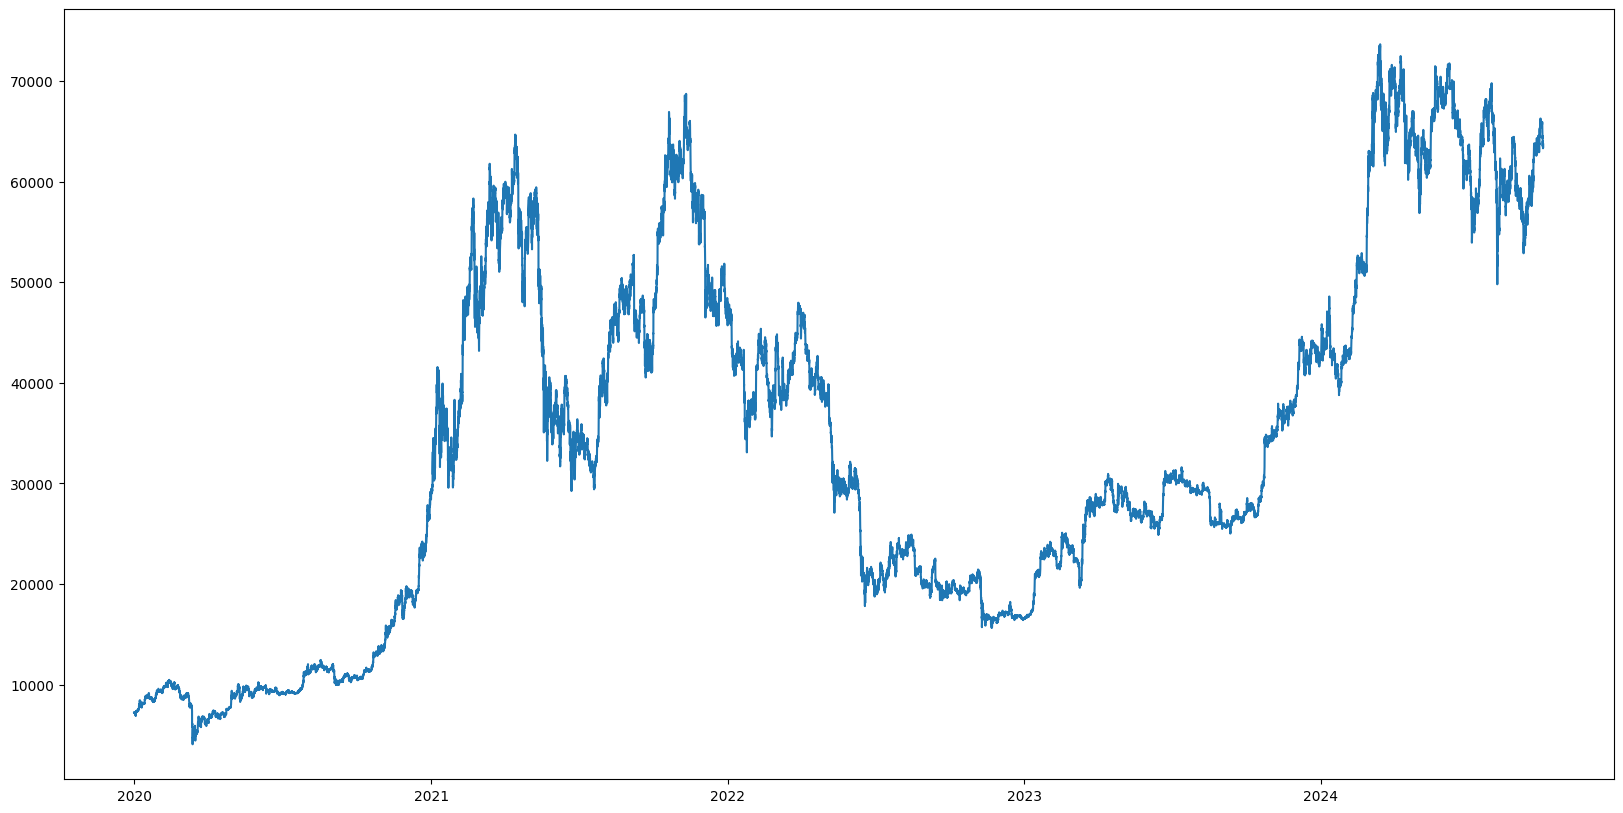

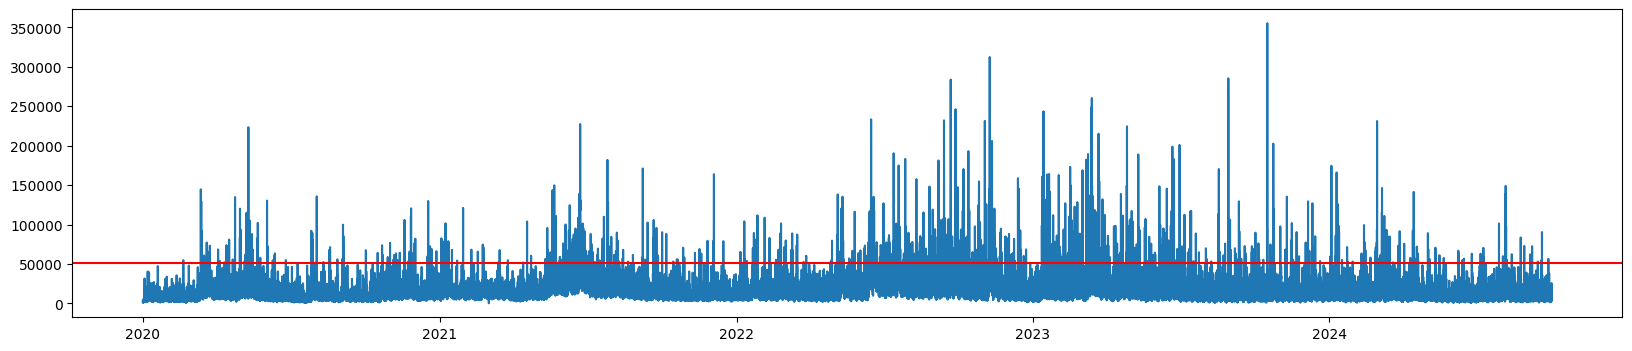

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['open'])
plt.figure(figsize=(20, 4))
plt.plot(df.index, df['volume'])
plt.axhline(df['volume'].std() * 3, color='r')

In [9]:
correlation = df['open'].corr(df['volume'])
correlation

-0.18965487398104405